# Sprint3課題 機械学習スクラッチ線形回帰



## 【問題1】線形回帰のクラスを作成する

線形回帰のクラスを作成し、Sprint2で作成した回帰のパイプラインに組み込んでください。

以下が雛形です。ここにメソッドを加えていってください。メソッドやパラメータなどはscikit-learnを参考にしてください。

[sklearn.linear_model.LinearRegression — scikit-learn 0.20.0 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

検証段階ではJupyter Notebook上で書いていき、最終的にはpyファイルにモジュールとしてまとめてください。

In [238]:
#まずは計算のイメージを掴む

In [239]:
#特徴量X
X = np.array([
    [1, 1, 2],
    [1, 3, 4],
    [1, 5, 6],
    [1, 7, 8],
    [1, 9, 10]
])
X

array([[ 1,  1,  2],
       [ 1,  3,  4],
       [ 1,  5,  6],
       [ 1,  7,  8],
       [ 1,  9, 10]])

In [240]:
#目的変数y
y = np.array([5, 4, 3, 2, 1]).reshape(-1, 1)
y

array([[5],
       [4],
       [3],
       [2],
       [1]])

In [241]:
#Xの係数theta
theta = np.empty((0,3))
theta = np.append(theta, np.array([[0,0,0]]), axis=0)
theta

array([[0., 0., 0.]])

In [242]:
#Hypothesis function
#thetaとxから求めたyの予測値
h = theta[-1,:].dot(X.T).reshape(-1, 1)
h

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [243]:
#Cost functionを順を追って計算

#誤差(error)の2乗を計算
#残差（residual）は測定値 - 平均値
(h - y)**2

array([[25.],
       [16.],
       [ 9.],
       [ 4.],
       [ 1.]])

In [244]:
#Sample方向に足す（Σ）
((h - y)**2).sum()

55.0

In [245]:
#Cost function
J = ((h - y)**2).sum()/(2*len(X))
J

5.5

In [246]:
#thetaを順を追って更新していく

#error
(h - y) 

array([[-5.],
       [-4.],
       [-3.],
       [-2.],
       [-1.]])

In [247]:
(h- y) * X

array([[ -5.,  -5., -10.],
       [ -4., -12., -16.],
       [ -3., -15., -18.],
       [ -2., -14., -16.],
       [ -1.,  -9., -10.]])

In [248]:
#sample方向に足して（Σ）、サンプル数で割る
grad = ((h - y)* X).sum(axis=0)/len(X)
grad

array([ -3., -11., -14.])

In [249]:
#thetaを更新
alpha = 0.1
theta = np.append(theta,  np.array([theta[-1,:] - alpha * grad]), axis=0)
theta

array([[0. , 0. , 0. ],
       [0.3, 1.1, 1.4]])

In [ ]:
#クラス化

In [312]:
import numpy as np

class ScratchLinearRegression():
    """
    線形回帰のスクラッチ実装

    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue

    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      学習用データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証用データに対する損失の記録

    """

    def __init__(self, num_iter, lr, bias=1, verbose=False):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        線形回帰を学習する。検証用データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            学習用データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            学習用データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証用データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証用データの正解値
        """

        #XにX_0の列をbias埋めで追加（切片の項を追加）
        X = np.concatenate((np.full((len(X), 1), self.bias), X), axis=1)
        
        # yのshapeを(n_samples, )から(n_samples, 1)にする
        y = y.reshape(-1,1)
        
        #coef_ (theta)を初期化 (1, n_features)
        #-1 ~ 1の乱数で
        a = -1
        b = 1
        self.coef_ = (b - a) * np.random.rand(X.shape[1]).reshape(1,-1)  + a     
        
        #self.iterの回数だけself.coef_を更新しながらhも更新していく
        for i in range(self.iter):
            #予測値h
            h = self._linear_hypothesis(X)

            #Cost, mse, error
            J, mse, error = self._cost(h, y)

            #errorを元にgradを計算してself.coef_を更新
            self._gradient_descent(X, error)
            
            #costをval_lossに記録
            self.loss[i] = mse
        
        #確認
        print("X: \n", X, "\n")
        print("optimized theta: \n", self.coef_)    
        
        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print(self.loss)


    def predict(self, X_test):
        """
        線形回帰を使い推定する。

        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル

        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            線形回帰による推定結果
        """
        #XにX_0の列を追加（切片の項を追加）
        X_test = np.concatenate((np.full((len(X_test), 1), self.bias), X_test), axis=1)
        
        #a.dot(b)よりもnp.dot(a, b)の方が早い(np.dotはC言語、a.dotはPythonでの処理なので)
        pred = np.dot(X_test, (self.coef_).T)
        
        return pred

    def _linear_hypothesis(self, X):
        """
        線形の仮定関数を計算する

        Parameters
        ----------
        X : ndarray of shape (n_samples, n_features)
          学習データ

        Returns
        -------
          ndarray of shape (n_samples, 1)
          線形の仮定関数による推定結果

        """
        
        h = np.dot(X, (self.coef_).T)
        
        return h
      
    def _cost(self, h, y):
        """
        cost(MSE/2)の計算

        Parameters
        ----------
        y_pred : ndarray of shape (n_samples,)
          推定した値
        y : ndarray of shape (n_samples,)
          正解値

        Returns
        ----------
        J = MSE/2 : numpy.float
          MSE: 平均二乗誤差
        """
        error = h - y
        
        #mse = (error**2).sum(axis=0)/len(y)
        #アダマール積の和は転置行列の内積に等しいので内積で書く
        mse = np.dot(error.T, error)/len(y)
        J = mse/2
        return J, mse, error

    def _gradient_descent(self, X, error):
        """
        Parameters
        ----------
        X: ndarray of shape (n_samples, n_features)
          学習データ

        error: y_pred - y
           予測値と実際のyの差
        Returns
        ----------
        インスタンス変数のtheta (self.coef_)を更新

        """
        #grad = (error * X).sum(axis=0)/len(X)
        #上の計算と同義。早い方で
        grad = np.dot(error.T, X)/len(X)
        self.coef_ =  self.coef_ - self.lr * grad

In [324]:
#クラスの動作確認

In [325]:
#read data
import pandas as pd
import numpy as np

#read csv file to get data frame
df = pd.read_csv('train.csv')

#split into features X and target y
X = df.loc[:, ["YearBuilt", "GrLivArea"]]
df['SalePriceLog'] = np.log(df["SalePrice"])
y = df.loc[:, ['SalePriceLog']]

In [326]:
#confirm datra
print(X.head(), "\n")
print(y.head())

   YearBuilt  GrLivArea
0       2003       1710
1       1976       1262
2       2001       1786
3       1915       1717
4       2000       2198 

   SalePriceLog
0     12.247694
1     12.109011
2     12.317167
3     11.849398
4     12.429216


In [327]:
#Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=3/4, test_size=1/4)

In [328]:
#Standarize
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
#trainデータからmeanとstdevを計算
scaler.fit(X_train)
#normarize x -> (x - x_mean)/s
X_train_z = scaler.transform(X_train)
X_test_z = scaler.transform(X_test)

/Users/ohmori/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/ohmori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  
/Users/ohmori/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [329]:
#インスタンス生成
reg = ScratchLinearRegression(num_iter=500, lr=0.01, bias=1, verbose=False)

In [330]:
#fit with train data
reg.fit(X_train_z, y_train.values)

X: 
 [[ 1.         -0.00613346 -1.39882433]
 [ 1.          0.16010759 -0.32775086]
 [ 1.         -0.53810481  0.57490292]
 ...
 [ 1.         -0.23887092 -1.03549199]
 [ 1.          1.09105744  0.87767987]
 [ 1.          1.22405028  0.65248951]] 

optimized theta: 
 [[11.94460156  0.20148332  0.22219629]]


In [331]:
#predict test data
scrach_pred = reg.predict(X_test_z)

In [332]:
#結果のPlot用の関数
import matplotlib.pyplot as plt

def plot_reg_result(n_iter, loss, y_test, y_pred):
    fig, axes = plt.subplots(1,2, figsize=(10,4 ))
    axes[0].plot(np.array(range(n_iter)), loss, "o-")
    axes[1].plot(y_test, y_pred, "o")
    axes[1].plot(y_test, y_test)
    
    #label
    axes[0].set_xlabel('n of iterations')
    axes[0].set_ylabel('MSE')
    axes[1].set_xlabel('y_test')
    axes[1].set_ylabel('y_pred')

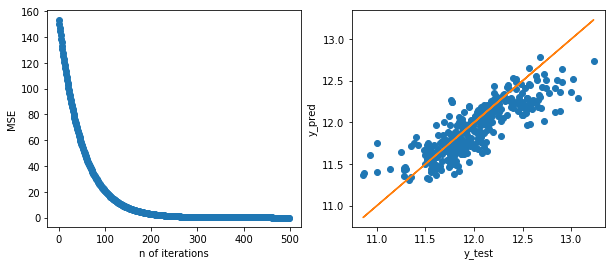

In [333]:
#plot
plot_reg_result(reg.iter, reg.loss, y_test, scrach_pred)

In [334]:
#評価
#決定係数R^2とMSEを算出
u = ((y_test - scrach_pred)**2).sum(axis=0)
v = ((y_test - y_test.mean() )**2).sum(axis=0)

r2 = 1 - u/v
mse = u/len(y_test)

print('R^2: %f' % r2)
print('MSE: %f' % mse)

R^2: 0.646546
MSE: 0.052728


In [335]:
#scikit-learnで答えを確認
from sklearn.linear_model import LinearRegression
lnr_reg = LinearRegression()

#learn
learned_model_lnr_reg = lnr_reg.fit(X_train_z, y_train)

#predict
pred = learned_model_lnr_reg.predict(X_test_z)

In [336]:
#決定係数R^2とMSEを算出

u = ((y_test - pred)**2).sum(axis=0)
v = ((y_test - y_test.mean() )**2).sum(axis=0)

r2 = 1 - u/v
mse = u/len(y_test)

print('R^2: %f' % r2)
print('MSE: %f' % mse)

R^2: 0.701664
MSE: 0.044506


## 【問題2】学習曲線のプロット
まず、学習曲線を表示する関数を作成してください。

線形回帰クラスの雛形ではself.loss, self.val_lossに損失を記録しておくようになっているため、入力にはこれを利用してください。



## 【問題3】（アドバンス課題）バイアス項の除去
バイアス項 を抜くと学習がどう変化するか検証してください。また、線形回帰モデルにおけるバイアス項の役割の考察・調査を行ってください。

X: 
 [[ 1.         -0.00613346 -1.39882433]
 [ 1.          0.16010759 -0.32775086]
 [ 1.         -0.53810481  0.57490292]
 ...
 [ 1.         -0.23887092 -1.03549199]
 [ 1.          1.09105744  0.87767987]
 [ 1.          1.22405028  0.65248951]] 

optimized theta: 
 [[11.94331615  0.18780504  0.23863727]]


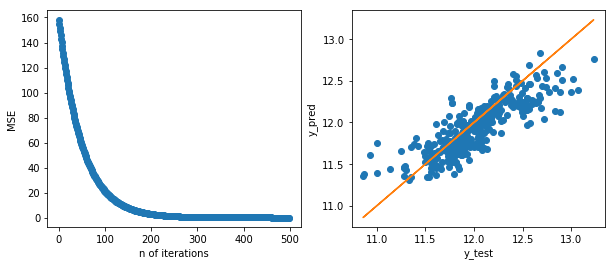

In [346]:
#bias = 1 の時
reg_bias= ScratchLinearRegression(num_iter=500, lr=0.01, bias=1, verbose=False)
reg_bias.fit(X_train_z, y_train.values)
pred_bias = reg_bias.predict(X_test_z)
plot_reg_result(reg_bias.iter, reg_bias.loss, y_test, pred_bias)

X: 
 [[ 1.00000000e+01 -6.13345960e-03 -1.39882433e+00]
 [ 1.00000000e+01  1.60107586e-01 -3.27750865e-01]
 [ 1.00000000e+01 -5.38104807e-01  5.74902920e-01]
 ...
 [ 1.00000000e+01 -2.38870924e-01 -1.03549199e+00]
 [ 1.00000000e+01  1.09105744e+00  8.77679871e-01]
 [ 1.00000000e+01  1.22405028e+00  6.52489514e-01]] 

optimized theta: 
 [[1.20256951 0.20207911 0.22131331]]


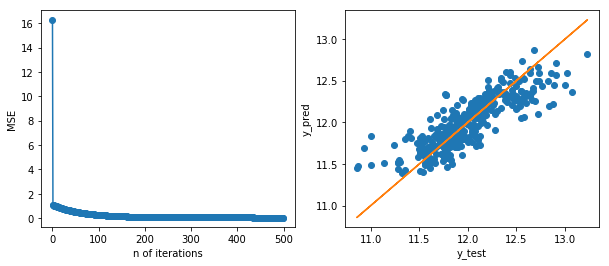

In [348]:
#bias = 10 の時
reg_bias= ScratchLinearRegression(num_iter=500, lr=0.01, bias=10, verbose=False)
reg_bias.fit(X_train_z, y_train.values)
pred_bias = reg_bias.predict(X_test_z)
plot_reg_result(reg_bias.iter, reg_bias.loss, y_test, pred_bias)

X: 
 [[-1.         -0.00613346 -1.39882433]
 [-1.          0.16010759 -0.32775086]
 [-1.         -0.53810481  0.57490292]
 ...
 [-1.         -0.23887092 -1.03549199]
 [-1.          1.09105744  0.87767987]
 [-1.          1.22405028  0.65248951]] 

optimized theta: 
 [[-11.94447435   0.17997497   0.24166207]]


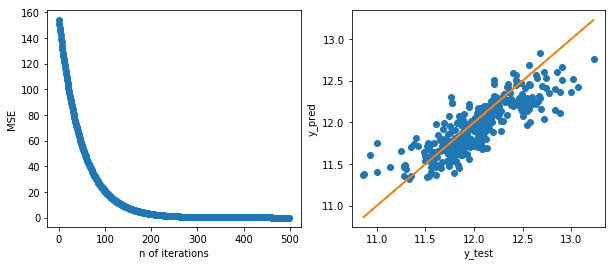

In [349]:
#bias = -1 の時
reg_bias= ScratchLinearRegression(num_iter=500, lr=0.01, bias=-1, verbose=False)
reg_bias.fit(X_train_z, y_train.values)
pred_bias = reg_bias.predict(X_test_z)
plot_reg_result(reg_bias.iter, reg_bias.loss, y_test, pred_bias)

X: 
 [[ 0.         -0.00613346 -1.39882433]
 [ 0.          0.16010759 -0.32775086]
 [ 0.         -0.53810481  0.57490292]
 ...
 [ 0.         -0.23887092 -1.03549199]
 [ 0.          1.09105744  0.87767987]
 [ 0.          1.22405028  0.65248951]] 

optimized theta: 
 [[-0.37938199  0.19897351  0.22324378]]


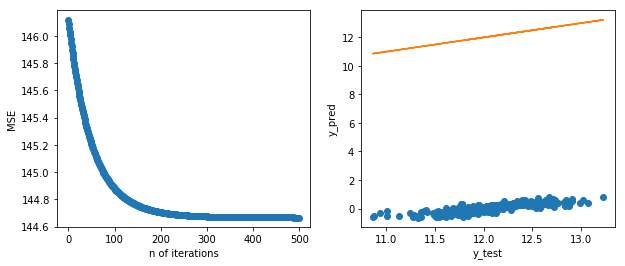

In [350]:
#bias = 0 の時
reg_bias= ScratchLinearRegression(num_iter=500, lr=0.01, bias=0, verbose=False)
reg_bias.fit(X_train_z, y_train.values)
pred_bias = reg_bias.predict(X_test_z)
plot_reg_result(reg_bias.iter, reg_bias.loss, y_test, pred_bias)

bias項がゼロの時、傾きは正しくても、正解値（オレンジ線）から並行移動したような位置で予測されてしまった。<br>
$\theta_{0}$が小さくなってしまい、$x_{0}\cdot \theta_{0}$が10.5程度に落ち着くべきところがことが非常に小さな値となってしまったことが原因と考えられる。このbias = 0がbias項の除去に等しいと思われ、bias項によって予測に切片の影響が組み入れられると理解できる。

## 【問題4】（アドバンス課題）特徴量の多次元化
特徴量の二乗や三乗を入力に利用すると学習結果がどう変化するか検証してください。

$y$が仮定関数$h_{\theta}(x) = \theta_{0} + \theta_{1}x + \theta_{2}x^2$によってよく表されると仮定すると、$h$は$x$に対しては線形ではないが、$\theta$に対しては線形である。

## 【問題5】（アドバンス課題）更新式の導出
最急降下法の更新式は以下でした。この式が導出される過程を説明してください。

特徴量、パラメータをそれぞれ<br>
$$
x = (x_0, x_1, \cdots, x_m)
$$
$$
\theta = (\theta_0, \theta_1, \cdots, \theta_m)
$$
として、$y$の予測値（仮定関数）を
$$
h_{\theta}(x) = \theta_{0}x_0 + \theta_{1}x_1 + \cdots + \theta_{m}x_m
$$

とする。<br>
$h$と$y$に関する平均二乗誤差を２で除したものをコスト関数$J$と定義すると、$J$を最小化するような係数のベクトル$\theta$を求めることが、yの回帰に相当する。<br>


$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)}) - y^{(i)})^2
$$

$ J$を特徴量$x_j$に対応する係数$\theta_j$に関して偏微分して、

$$
\begin{eqnarray}
\frac{\partial}{\partial \theta_j}J(\theta) &=& \frac{\partial}{\partial \theta_j}\frac{1}{2m}\sum_{i=1}^{m} \Bigl(h_{\theta}(x^{(i)}) - y^{(i)}\Bigr)^2\\
&=& \frac{1}{2m}\sum_{i=1}^{m} \frac{\partial}{\partial \theta_j}\Bigl(h_{\theta}(x^{(i)}) - y^{(i)}\Bigr)^2 \\
&=& \frac{1}{2m}\sum_{i=1}^{m} \Bigl[\frac{\partial}{\partial h}\Bigl(h_{\theta}(x^{(i)}) - y^{(i)}\Bigr)^2 \cdot \frac{\partial h}{\partial \theta_j}\Bigr] \\
&=&\frac{1}{2m}\sum_{i=1}^{m}\Bigl[2 \cdot \Bigl(h_{\theta}(x^{(i)}) - y^{(i)}\Bigr)\cdot x_{j}^{(i)}\Bigr]\\
&=&\frac{1}{m}\sum_{i=1}^{m}\Bigl[\Bigl(h_{\theta}(x^{(i)}) - y^{(i)}\Bigr)\cdot x_j^{(i)}\Bigr]
\end{eqnarray}
$$

更新式のgradientの部分が求められた。

## 【問題6】（アドバンス課題）局所最適解の問題
最急降下法には一般的に局所最適解の問題があります。しかし、線形回帰では学習を続ければ必ず最適解を求めることができます。それはなぜか数式やグラフを用いて説明してください。

## 【問題7】スクラッチで学べることは何か
最終発表時に以下の内容についてディスカッションを行います。自分なりの意見を用意しておいてください。

ライブラリを使うのではなくスクラッチでアルゴリズムを実装したことで学べたことは何か